# Smoothing

We can smooth an image, e.g. using a gaussian filter.

Here we try a couple different smoothing options, and compare the output to the original.

We then try to orchestrate this process for the full dataset (rather than just a window over Canberra). 
One way this could be done is by letting dask handle chunking the computation, and padding the borders of the chunks
so that the smoothing does not introduce boundary seams.

Unfortunately, running into some bugs when attempting to save the continental raster output..

In [1]:
import rasterio, xarray, numpy as np, matplotlib.pyplot as plt
import scipy.signal, scipy.ndimage, rasterio.windows

In [2]:
sourcename = "/g/data/r78/LCCS_Aberystwyth/Belle/mads/ls8_all.vrt"
f = rasterio.open(sourcename)
f.count, f.shape

(3, (157000, 168000))

In [3]:
ds = xarray.open_rasterio(sourcename, chunks=dict(x=1000, y=1000))
spectral = ds.sel(band=1)

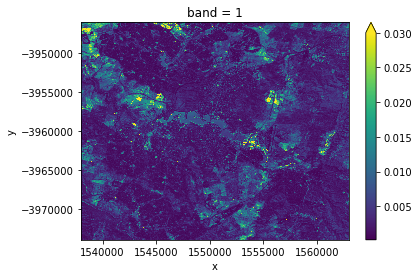

In [4]:
#subset = spectral.loc[-3946000:-3974000, 1538000:1563000]
subset = spectral.sel(x=slice(1538000, 1563000), y=slice(-3946000, -3974000))
subset.plot(vmax=0.03)

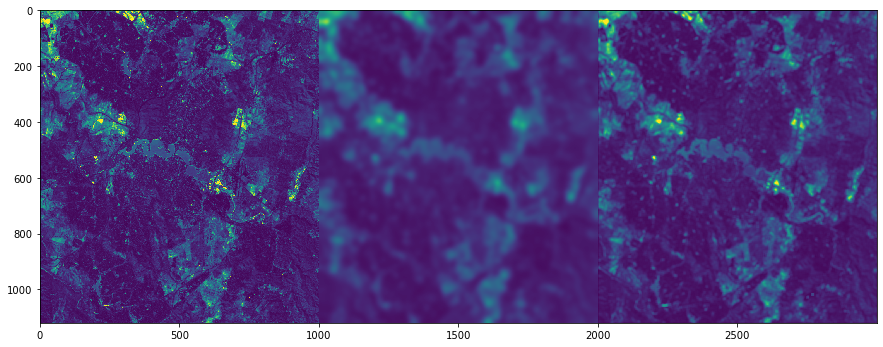

In [5]:
plt.figure(figsize=(15,15))
plt.imshow(np.hstack([subset.values, 
                      scipy.ndimage.gaussian_filter(subset.values, sigma=10),
                      scipy.signal.convolve2d(subset.values, np.ones((10,10))/(10*10), mode='same')]
                    ), vmax=0.03)

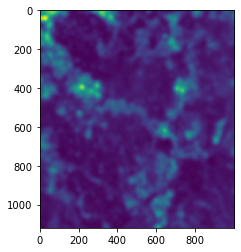

In [6]:
x = subset.data.map_overlap(scipy.ndimage.gaussian_filter, depth=100, sigma=10).compute()
plt.imshow(x)

In [7]:
work = spectral.copy()
work.data = work.data.map_overlap(scipy.ndimage.gaussian_filter, depth=100, sigma=10)

In [8]:
work.to_netcdf("~/groupspace/smooth.nc", engine='h5netcdf')

RasterioIOError: Read or write failed. /g/data/u46/users/dxr251/mad/mad_57_-124.tif, band 1: IReadBlock failed at X offset 3, Y offset 1: TIFFReadEncodedTile() failed.

In [ ]:
1+3

In [56]:
profile = f.profile.copy()
profile.update(dict(driver='GTiff', tiled=True, blockxsize=256, blockysize=256, nodata=0,
                    compress='lzw', num_threads='all_cpus', 
                    BIGTIFF='YES', SPARSE_OK='TRUE',
                    count=1))
class output:
    def __init__(self, fname):
        self.file = rasterio.open(fname, mode='w', **profile)
    def __setitem__(self, key, value):
        print(key, value.shape, np.mean(value), np.min(value), np.max(value))
        self.file.write(value, window=rasterio.windows.Window.from_slices(*key), indexes=1)

In [55]:
out = output('/g/data1a/u46/users/brl654/delme.tif')
work = spectral.copy()
#work.data = work.data.map_overlap(scipy.ndimage.gaussian_filter, depth=100, sigma=10)
work.data.store(out)
out.file.close()

(slice(101000, 102000, None), slice(74000, 75000, None)) (1000, 1000) 0.023320595 0.009077312 0.040139116
(slice(123000, 124000, None), slice(39000, 40000, None)) (1000, 1000) nan nan nan
(slice(18000, 19000, None), slice(23000, 24000, None)) (1000, 1000) nan nan nan
(slice(145000, 146000, None), slice(91000, 92000, None)) (1000, 1000) nan nan nan
(slice(88000, 89000, None), slice(38000, 39000, None)) (1000, 1000) 0.0006986588 6.962176e-05 0.07164228
(slice(52000, 53000, None), slice(140000, 141000, None)) (1000, 1000) 0.0017318558 0.00013981316 0.0743637
(slice(67000, 68000, None), slice(163000, 164000, None)) (1000, 1000) 0.014463576 0.0064735636 0.025014713
(slice(131000, 132000, None), slice(22000, 23000, None)) (1000, 1000) nan nan nan
(slice(63000, 64000, None), slice(65000, 66000, None)) (1000, 1000) 0.0004414388 9.9227334e-05 0.06660283
(slice(21000, 22000, None), slice(82000, 83000, None)) (1000, 1000) 0.0022768534 0.00016647442 0.05660474
(slice(7000, 8000, None), slice(5000,

(slice(109000, 110000, None), slice(117000, 118000, None)) (1000, 1000) 0.0010365861 8.417037e-05 0.044366054
(slice(75000, 76000, None), slice(162000, 163000, None)) (1000, 1000) 0.018783905 0.009777077 0.03036437
(slice(95000, 96000, None), slice(140000, 141000, None)) (1000, 1000) 0.0016587768 0.00014603227 0.15861271
(slice(53000, 54000, None), slice(17000, 18000, None)) (1000, 1000) 0.009918788 8.9132074e-05 0.101237394
(slice(39000, 40000, None), slice(64000, 65000, None)) (1000, 1000) 0.0020265484 0.00014624074 0.03669976
(slice(15000, 16000, None), slice(4000, 5000, None)) (1000, 1000) nan nan nan
(slice(80000, 81000, None), slice(10000, 11000, None)) (1000, 1000) 0.00044553945 7.79159e-05 0.06419795
(slice(76000, 77000, None), slice(152000, 153000, None)) (1000, 1000) 0.002468689 0.00026348134 0.053476557
(slice(42000, 43000, None), slice(11000, 12000, None)) (1000, 1000) nan nan nan
(slice(115000, 116000, None), slice(3000, 4000, None)) (1000, 1000) nan nan nan
(slice(91000, 

(slice(85000, 86000, None), slice(84000, 85000, None)) (1000, 1000) 0.00020984926 6.698337e-05 0.005495227
(slice(51000, 52000, None), slice(161000, 162000, None)) (1000, 1000) nan nan nan
(slice(71000, 72000, None), slice(131000, 132000, None)) (1000, 1000) 0.0010991816 8.430016e-05 0.08938064
(slice(61000, 62000, None), slice(16000, 17000, None)) (1000, 1000) 0.0009799162 7.394126e-05 0.021465434
(slice(47000, 48000, None), slice(71000, 72000, None)) (1000, 1000) 0.0016518618 0.00010154302 0.013681471
(slice(88000, 89000, None), slice(27000, 28000, None)) (1000, 1000) 0.00042391266 7.6397395e-05 0.09978633
(slice(54000, 55000, None), slice(154000, 155000, None)) (1000, 1000) 0.013387521 0.002511174 0.030875232
(slice(18000, 19000, None), slice(124000, 125000, None)) (1000, 1000) 0.006313023 0.00060019235 0.049676433
(slice(123000, 124000, None), slice(2000, 3000, None)) (1000, 1000) nan nan nan
(slice(101000, 102000, None), slice(81000, 82000, None)) (1000, 1000) 0.021776166 0.009715

(slice(34000, 35000, None), slice(54000, 55000, None)) (1000, 1000) 0.001777239 0.00013824848 0.0474077
(slice(24000, 25000, None), slice(121000, 122000, None)) (1000, 1000) 0.0073260455 0.00021997625 0.09012487
(slice(44000, 45000, None), slice(123000, 124000, None)) (1000, 1000) 0.0014675941 0.00014579335 0.028991902
(slice(10000, 11000, None), slice(42000, 43000, None)) (1000, 1000) nan nan nan
(slice(83000, 84000, None), slice(36000, 37000, None)) (1000, 1000) 0.0005374751 5.1089646e-05 0.080812745
(slice(147000, 148000, None), slice(119000, 120000, None)) (1000, 1000) 0.011699798 0.002574773 0.034953382
(slice(93000, 94000, None), slice(87000, 88000, None)) (1000, 1000) 0.00045075445 7.2038536e-05 0.004484226
(slice(79000, 80000, None), slice(130000, 131000, None)) (1000, 1000) 0.00045526956 8.801324e-05 0.06740005
(slice(37000, 38000, None), slice(51000, 52000, None)) (1000, 1000) 0.0019188515 0.00013734993 0.08526782
(slice(23000, 24000, None), slice(70000, 71000, None)) (1000, 

(slice(29000, 30000, None), slice(113000, 114000, None)) (1000, 1000) 0.015651528 0.00965154 0.02699175
(slice(15000, 16000, None), slice(32000, 33000, None)) (1000, 1000) nan nan nan
(slice(80000, 81000, None), slice(102000, 103000, None)) (1000, 1000) 0.00081344217 4.9355604e-05 0.011360357
(slice(156000, 157000, None), slice(113000, 114000, None)) (1000, 1000) nan nan nan
(slice(78000, 79000, None), slice(141000, 142000, None)) (1000, 1000) 0.0023484293 0.00015834322 0.06750698
(slice(142000, 143000, None), slice(34000, 35000, None)) (1000, 1000) nan nan nan
(slice(42000, 43000, None), slice(55000, 56000, None)) (1000, 1000) 0.0010146354 0.00011199067 0.019700002
(slice(115000, 116000, None), slice(39000, 40000, None)) (1000, 1000) 0.018589202 0.005314658 0.037413217
(slice(0, 1000, None), slice(110000, 111000, None)) (1000, 1000) nan nan nan
(slice(91000, 92000, None), slice(99000, 100000, None)) (1000, 1000) 0.0003528115 4.5968933e-05 0.066627726
(slice(155000, 156000, None), slic

(slice(151000, 152000, None), slice(138000, 139000, None)) (1000, 1000) 0.012484703 0.0037465317 0.030908983
(slice(85000, 86000, None), slice(104000, 105000, None)) (1000, 1000) 0.00046394547 5.7488687e-05 0.029786063
(slice(129000, 130000, None), slice(89000, 90000, None)) (1000, 1000) nan nan nan
(slice(51000, 52000, None), slice(69000, 70000, None)) (1000, 1000) 0.0009613227 0.00012760005 0.007721079
(slice(27000, 28000, None), slice(129000, 130000, None)) (1000, 1000) 0.0052390904 0.00026791345 0.08937507
(slice(47000, 48000, None), slice(163000, 164000, None)) (1000, 1000) nan nan nan
(slice(5000, 6000, None), slice(80000, 81000, None)) (1000, 1000) 0.009291462 0.0024535323 0.017594628
(slice(88000, 89000, None), slice(103000, 104000, None)) (1000, 1000) 0.00025172174 4.7732996e-05 0.03175578
(slice(18000, 19000, None), slice(88000, 89000, None)) (1000, 1000) 0.0035199441 0.00022103344 0.04444933
(slice(145000, 146000, None), slice(26000, 27000, None)) (1000, 1000) nan nan nan
(s

(slice(24000, 25000, None), slice(69000, 70000, None)) (1000, 1000) 0.004748796 0.00036580834 0.08771682
(slice(44000, 45000, None), slice(159000, 160000, None)) (1000, 1000) nan nan nan
(slice(10000, 11000, None), slice(22000, 23000, None)) (1000, 1000) nan nan nan
(slice(83000, 84000, None), slice(8000, 9000, None)) (1000, 1000) 0.017122984 0.00013175607 0.047417853
(slice(147000, 148000, None), slice(91000, 92000, None)) (1000, 1000) nan nan nan
(slice(93000, 94000, None), slice(123000, 124000, None)) (1000, 1000) 0.00036797937 5.772426e-05 0.041711863
(slice(137000, 138000, None), slice(72000, 73000, None)) (1000, 1000) nan nan nan
(slice(37000, 38000, None), slice(23000, 24000, None)) (1000, 1000) nan nan nan
(slice(3000, 4000, None), slice(128000, 129000, None)) (1000, 1000) 0.007567777 0.00083447644 0.026087726
(slice(23000, 24000, None), slice(98000, 99000, None)) (1000, 1000) 0.017513586 0.010283197 0.026757566
(slice(13000, 14000, None), slice(83000, 84000, None)) (1000, 1000

(slice(29000, 30000, None), slice(21000, 22000, None)) (1000, 1000) nan nan nan
(slice(146000, 147000, None), slice(156000, 157000, None)) (1000, 1000) nan nan nan
(slice(15000, 16000, None), slice(76000, 77000, None)) (1000, 1000) 0.006198528 0.00030522433 0.07354787
(slice(80000, 81000, None), slice(66000, 67000, None)) (1000, 1000) 0.0004702713 9.2659684e-05 0.006537256
(slice(156000, 157000, None), slice(85000, 86000, None)) (1000, 1000) nan nan nan
(slice(78000, 79000, None), slice(113000, 114000, None)) (1000, 1000) 0.00029091237 4.790355e-05 0.031538494
(slice(142000, 143000, None), slice(6000, 7000, None)) (1000, 1000) nan nan nan
(slice(56000, 57000, None), slice(6000, 7000, None)) (1000, 1000) 0.012322688 0.0061548934 0.030885011
(slice(22000, 23000, None), slice(157000, 158000, None)) (1000, 1000) nan nan nan
(slice(115000, 116000, None), slice(75000, 76000, None)) (1000, 1000) nan nan nan
(slice(0, 1000, None), slice(74000, 75000, None)) (1000, 1000) nan nan nan
(slice(9100

(slice(135000, 136000, None), slice(129000, 130000, None)) (1000, 1000) 0.015795482 0.00034799502 0.03697109
(slice(155000, 156000, None), slice(99000, 100000, None)) (1000, 1000) nan nan nan
(slice(49000, 50000, None), slice(133000, 134000, None)) (1000, 1000) 0.002034137 0.00018192909 0.03554612
(slice(69000, 70000, None), slice(99000, 100000, None)) (1000, 1000) 0.00016406273 4.6144265e-05 0.0043116594
(slice(45000, 46000, None), slice(31000, 32000, None)) (1000, 1000) 0.019694088 0.012044918 0.031669617
(slice(118000, 119000, None), slice(47000, 48000, None)) (1000, 1000) nan nan nan
(slice(11000, 12000, None), slice(152000, 153000, None)) (1000, 1000) nan nan nan
(slice(31000, 32000, None), slice(106000, 107000, None)) (1000, 1000) 0.012220697 0.00565547 0.021026203
(slice(94000, 95000, None), slice(59000, 60000, None)) (1000, 1000) 0.0009543075 0.00019933282 0.018059839
(slice(72000, 73000, None), slice(108000, 109000, None)) (1000, 1000) 0.00024054783 5.047674e-05 0.057410337
(s

(slice(47000, 48000, None), slice(144000, 145000, None)) (1000, 1000) 0.014924263 0.0002258126 0.09287362
(slice(5000, 6000, None), slice(13000, 14000, None)) (1000, 1000) nan nan nan
(slice(154000, 155000, None), slice(148000, 149000, None)) (1000, 1000) nan nan nan
(slice(88000, 89000, None), slice(74000, 75000, None)) (1000, 1000) 0.00055377436 9.711036e-05 0.044315144
(slice(132000, 133000, None), slice(77000, 78000, None)) (1000, 1000) nan nan nan
(slice(54000, 55000, None), slice(73000, 74000, None)) (1000, 1000) 0.0009037841 0.00017345369 0.0041860323
(slice(32000, 33000, None), slice(30000, 31000, None)) (1000, 1000) nan nan nan
(slice(30000, 31000, None), slice(149000, 150000, None)) (1000, 1000) nan nan nan
(slice(8000, 9000, None), slice(66000, 67000, None)) (1000, 1000) nan nan nan
(slice(145000, 146000, None), slice(47000, 48000, None)) (1000, 1000) nan nan nan
(slice(67000, 68000, None), slice(15000, 16000, None)) (1000, 1000) 0.00039816173 5.1543168e-05 0.013370102
(slic

(slice(131000, 132000, None), slice(107000, 108000, None)) (1000, 1000) 0.020243067 0.0037570691 0.05363572
(slice(57000, 58000, None), slice(141000, 142000, None)) (1000, 1000) 0.0017358565 0.00012842542 0.092405155
(slice(77000, 78000, None), slice(107000, 108000, None)) (1000, 1000) 0.0013849029 5.106953e-05 0.070134446
(slice(21000, 22000, None), slice(39000, 40000, None)) (1000, 1000) nan nan nan
(slice(126000, 127000, None), slice(39000, 40000, None)) (1000, 1000) nan nan nan
(slice(7000, 8000, None), slice(114000, 115000, None)) (1000, 1000) nan nan nan
(slice(148000, 149000, None), slice(35000, 36000, None)) (1000, 1000) nan nan nan
(slice(70000, 71000, None), slice(35000, 36000, None)) (1000, 1000) 0.00036538558 5.8498626e-05 0.06720966
(slice(134000, 135000, None), slice(112000, 113000, None)) (1000, 1000) 0.014288855 0.005551092 0.031192116
(slice(48000, 49000, None), slice(84000, 85000, None)) (1000, 1000) 0.0006124246 0.00010060347 0.05868124
(slice(46000, 47000, None), sl

(slice(86000, 87000, None), slice(5000, 6000, None)) (1000, 1000) 0.013852673 0.005871153 0.025469327
(slice(130000, 131000, None), slice(140000, 141000, None)) (1000, 1000) 0.011750669 0.00037165693 0.11176514
(slice(64000, 65000, None), slice(82000, 83000, None)) (1000, 1000) 0.0005977223 7.116493e-05 0.016679458
(slice(140000, 141000, None), slice(69000, 70000, None)) (1000, 1000) nan nan nan
(slice(62000, 63000, None), slice(65000, 66000, None)) (1000, 1000) 0.00040107666 8.7788925e-05 0.006048475
(slice(40000, 41000, None), slice(22000, 23000, None)) (1000, 1000) nan nan nan
(slice(113000, 114000, None), slice(116000, 117000, None)) (1000, 1000) 0.00143501 0.00012218444 0.04362594
(slice(6000, 7000, None), slice(141000, 142000, None)) (1000, 1000) nan nan nan
(slice(26000, 27000, None), slice(163000, 164000, None)) (1000, 1000) nan nan nan
(slice(153000, 154000, None), slice(39000, 40000, None)) (1000, 1000) nan nan nan
(slice(75000, 76000, None), slice(23000, 24000, None)) (1000,

(slice(102000, 103000, None), slice(63000, 64000, None)) (1000, 1000) 0.02138595 0.008941069 0.038372364
(slice(15000, 16000, None), slice(122000, 123000, None)) (1000, 1000) 0.012317901 0.00024129012 0.0930624
(slice(156000, 157000, None), slice(43000, 44000, None)) (1000, 1000) nan nan nan
(slice(78000, 79000, None), slice(43000, 44000, None)) (1000, 1000) 0.0004369201 5.33424e-05 0.088793226
(slice(142000, 143000, None), slice(120000, 121000, None)) (1000, 1000) 0.017978543 0.006800176 0.03515509
(slice(56000, 57000, None), slice(92000, 93000, None)) (1000, 1000) 0.0006046153 9.622078e-05 0.0131282685
(slice(127000, 128000, None), slice(103000, 104000, None)) (1000, 1000) 0.017727736 0.0061294204 0.039799124
(slice(42000, 43000, None), slice(141000, 142000, None)) (1000, 1000) 0.0142901465 0.0034918326 0.026360288
(slice(115000, 116000, None), slice(129000, 130000, None)) (1000, 1000) 0.0047279675 0.00015186271 0.061260764
(slice(0, 1000, None), slice(48000, 49000, None)) (1000, 100

(slice(138000, 139000, None), slice(132000, 133000, None)) (1000, 1000) 0.012901214 0.0012214936 0.025697488
(slice(72000, 73000, None), slice(90000, 91000, None)) (1000, 1000) 0.0003386193 4.1483836e-05 0.036504462
(slice(38000, 39000, None), slice(89000, 90000, None)) (1000, 1000) 0.0056503196 0.0001544799 0.14928284
(slice(121000, 122000, None), slice(124000, 125000, None)) (1000, 1000) 0.005943477 0.00028876265 0.065503575
(slice(14000, 15000, None), slice(133000, 134000, None)) (1000, 1000) 0.0068583232 0.0011159072 0.01906405
(slice(129000, 130000, None), slice(63000, 64000, None)) (1000, 1000) nan nan nan
(slice(51000, 52000, None), slice(31000, 32000, None)) (1000, 1000) 0.0015768129 8.854186e-05 0.0870646
(slice(41000, 42000, None), slice(148000, 149000, None)) (1000, 1000) 0.012764556 0.0045405473 0.027551215
(slice(61000, 62000, None), slice(146000, 147000, None)) (1000, 1000) 0.0037066392 0.00021433282 0.1361266
(slice(124000, 125000, None), slice(123000, 124000, None)) (10

(slice(57000, 58000, None), slice(94000, 95000, None)) (1000, 1000) 0.0006826984 5.871238e-05 0.019229371
(slice(43000, 44000, None), slice(1000, 2000, None)) (1000, 1000) nan nan nan
(slice(126000, 127000, None), slice(114000, 115000, None)) (1000, 1000) 0.03118546 0.00047942696 0.08504707
(slice(7000, 8000, None), slice(167000, 168000, None)) (1000, 1000) nan nan nan
(slice(70000, 71000, None), slice(30000, 31000, None)) (1000, 1000) 0.0005599527 5.5360437e-05 0.009764334
(slice(134000, 135000, None), slice(163000, 164000, None)) (1000, 1000) nan nan nan
(slice(48000, 49000, None), slice(107000, 108000, None)) (1000, 1000) 0.0008976016 6.800722e-05 0.072606705
(slice(46000, 47000, None), slice(74000, 75000, None)) (1000, 1000) 0.002240902 0.0001790263 0.013408499
(slice(119000, 120000, None), slice(60000, 61000, None)) (1000, 1000) nan nan nan
(slice(97000, 98000, None), slice(111000, 112000, None)) (1000, 1000) 0.00047862373 5.1818366e-05 0.04329166
(slice(137000, 138000, None), sli

(slice(89000, 90000, None), slice(29000, 30000, None)) (1000, 1000) 0.00049429823 8.893408e-05 0.081895426
(slice(139000, 140000, None), slice(151000, 152000, None)) (1000, 1000) nan nan nan
(slice(33000, 34000, None), slice(113000, 114000, None)) (1000, 1000) 0.008655956 0.0001600336 0.12536876
(slice(19000, 20000, None), slice(0, 1000, None)) (1000, 1000) nan nan nan
(slice(116000, 117000, None), slice(14000, 15000, None)) (1000, 1000) nan nan nan
(slice(102000, 103000, None), slice(83000, 84000, None)) (1000, 1000) 0.017660005 0.007012926 0.034079254
(slice(15000, 16000, None), slice(166000, 167000, None)) (1000, 1000) nan nan nan
(slice(156000, 157000, None), slice(15000, 16000, None)) (1000, 1000) nan nan nan
(slice(78000, 79000, None), slice(15000, 16000, None)) (1000, 1000) 0.00029186817 4.7677768e-05 0.033707954
(slice(142000, 143000, None), slice(92000, 93000, None)) (1000, 1000) nan nan nan
(slice(56000, 57000, None), slice(120000, 121000, None)) (1000, 1000) 0.00059610757 6.

(slice(54000, 55000, None), slice(56000, 57000, None)) (1000, 1000) 0.00050855987 9.590331e-05 0.023248242
(slice(117000, 118000, None), slice(151000, 152000, None)) (1000, 1000) 0.014644633 0.005731347 0.03861477
(slice(32000, 33000, None), slice(105000, 106000, None)) (1000, 1000) 0.0034291912 0.00022793218 0.08081935
(slice(103000, 104000, None), slice(66000, 67000, None)) (1000, 1000) 0.019166028 0.004674624 0.052323315
(slice(8000, 9000, None), slice(29000, 30000, None)) (1000, 1000) nan nan nan
(slice(81000, 82000, None), slice(49000, 50000, None)) (1000, 1000) 0.00080372824 6.685589e-05 0.014771132
(slice(145000, 146000, None), slice(156000, 157000, None)) (1000, 1000) nan nan nan
(slice(57000, 58000, None), slice(53000, 54000, None)) (1000, 1000) 0.00046239272 8.445514e-05 0.0064012576
(slice(43000, 44000, None), slice(108000, 109000, None)) (1000, 1000) 0.00096108683 9.520007e-05 0.06944369
(slice(1000, 2000, None), slice(153000, 154000, None)) (1000, 1000) nan nan nan
(slice(

(slice(100000, 101000, None), slice(12000, 13000, None)) (1000, 1000) 0.019279031 0.008505482 0.035226233
(slice(140000, 141000, None), slice(13000, 14000, None)) (1000, 1000) nan nan nan
(slice(144000, 145000, None), slice(151000, 152000, None)) (1000, 1000) nan nan nan
(slice(62000, 63000, None), slice(9000, 10000, None)) (1000, 1000) 0.0011819054 5.067479e-05 0.020067845
(slice(20000, 21000, None), slice(148000, 149000, None)) (1000, 1000) nan nan nan
(slice(125000, 126000, None), slice(150000, 151000, None)) (1000, 1000) 0.020472052 0.007788885 0.03852928
(slice(40000, 41000, None), slice(94000, 95000, None)) (1000, 1000) 0.00718881 0.00016274206 0.13277587
(slice(111000, 112000, None), slice(65000, 66000, None)) (1000, 1000) nan nan nan
(slice(89000, 90000, None), slice(48000, 49000, None)) (1000, 1000) 0.00067088765 8.834092e-05 0.00928985
(slice(133000, 134000, None), slice(129000, 130000, None)) (1000, 1000) 0.014315715 0.00016043244 0.07870495
(slice(33000, 34000, None), slice

(slice(49000, 50000, None), slice(14000, 15000, None)) (1000, 1000) 0.0132626975 0.0058192406 0.022465693
(slice(35000, 36000, None), slice(65000, 66000, None)) (1000, 1000) 0.001956202 0.00015605794 0.065160066
(slice(25000, 26000, None), slice(82000, 83000, None)) (1000, 1000) 0.0018426287 0.00024379329 0.06989753
(slice(45000, 46000, None), slice(144000, 145000, None)) (1000, 1000) 0.014405517 0.0019696618 0.026358152
(slice(11000, 12000, None), slice(13000, 14000, None)) (1000, 1000) nan nan nan
(slice(108000, 109000, None), slice(125000, 126000, None)) (1000, 1000) 0.0018542821 0.00014272342 0.02751651
(slice(152000, 153000, None), slice(148000, 149000, None)) (1000, 1000) nan nan nan
(slice(38000, 39000, None), slice(26000, 27000, None)) (1000, 1000) nan nan nan
(slice(28000, 29000, None), slice(149000, 150000, None)) (1000, 1000) nan nan nan
(slice(87000, 88000, None), slice(64000, 65000, None)) (1000, 1000) 0.000402102 0.000115309944 0.0053067785
(slice(151000, 152000, None), s

(slice(68000, 69000, None), slice(47000, 48000, None)) (1000, 1000) 0.00043576138 8.57705e-05 0.007192008
(slice(30000, 31000, None), slice(40000, 41000, None)) (1000, 1000) 0.011537302 0.004918463 0.018140983
(slice(103000, 104000, None), slice(62000, 63000, None)) (1000, 1000) 0.015167376 0.0047767772 0.03282665
(slice(81000, 82000, None), slice(77000, 78000, None)) (1000, 1000) 0.00040383916 7.656253e-05 0.0047384407
(slice(57000, 58000, None), slice(17000, 18000, None)) (1000, 1000) 0.0012884963 0.00010822108 0.050928455
(slice(43000, 44000, None), slice(64000, 65000, None)) (1000, 1000) 0.0012718647 0.00013620837 0.08826017
(slice(84000, 85000, None), slice(10000, 11000, None)) (1000, 1000) 0.001852297 0.00012912153 0.03595778
(slice(46000, 47000, None), slice(11000, 12000, None)) (1000, 1000) nan nan nan
(slice(119000, 120000, None), slice(3000, 4000, None)) (1000, 1000) nan nan nan
(slice(95000, 96000, None), slice(71000, 72000, None)) (1000, 1000) 0.00063964044 0.00014257745 0.

(slice(113000, 114000, None), slice(136000, 137000, None)) (1000, 1000) 0.009812905 0.0002443438 0.05005791
(slice(6000, 7000, None), slice(57000, 58000, None)) (1000, 1000) nan nan nan
(slice(111000, 112000, None), slice(45000, 46000, None)) (1000, 1000) 0.024607545 0.00014390492 0.05232741
(slice(89000, 90000, None), slice(92000, 93000, None)) (1000, 1000) 0.00023954257 5.5858603e-05 0.023444932
(slice(133000, 134000, None), slice(165000, 166000, None)) (1000, 1000) nan nan nan
(slice(153000, 154000, None), slice(139000, 140000, None)) (1000, 1000) nan nan nan
(slice(33000, 34000, None), slice(48000, 49000, None)) (1000, 1000) 0.0032374696 0.00016851616 0.02149218
(slice(19000, 20000, None), slice(127000, 128000, None)) (1000, 1000) 0.008124919 0.00060527486 0.108958244
(slice(82000, 83000, None), slice(86000, 87000, None)) (1000, 1000) 0.00031494297 5.9837603e-05 0.0049183317
(slice(102000, 103000, None), slice(156000, 157000, None)) (1000, 1000) 0.0016942713 0.00014090104 0.0291963

(slice(71000, 72000, None), slice(95000, 96000, None)) (1000, 1000) 0.00038161958 8.7308625e-05 0.0020927303
(slice(135000, 136000, None), slice(42000, 43000, None)) (1000, 1000) nan nan nan
(slice(112000, 113000, None), slice(131000, 132000, None)) (1000, 1000) 0.005786593 0.00018130551 0.12985298
(slice(25000, 26000, None), slice(126000, 127000, None)) (1000, 1000) 0.003797308 0.00027484383 0.057875946
(slice(11000, 12000, None), slice(33000, 34000, None)) (1000, 1000) nan nan nan
(slice(108000, 109000, None), slice(33000, 34000, None)) (1000, 1000) 0.003360021 0.00016655013 0.04238334
(slice(152000, 153000, None), slice(112000, 113000, None)) (1000, 1000) nan nan nan
(slice(138000, 139000, None), slice(33000, 34000, None)) (1000, 1000) nan nan nan
(slice(38000, 39000, None), slice(62000, 63000, None)) (1000, 1000) 0.0017169792 0.00011396717 0.023681467
(slice(28000, 29000, None), slice(121000, 122000, None)) (1000, 1000) 0.004361863 0.00015175666 0.08233883
(slice(101000, 102000, No

(slice(41000, 42000, None), slice(56000, 57000, None)) (1000, 1000) 0.0008405147 9.4108575e-05 0.040205758
(slice(114000, 115000, None), slice(10000, 11000, None)) (1000, 1000) nan nan nan
(slice(27000, 28000, None), slice(71000, 72000, None)) (1000, 1000) 0.0020589281 0.00014431217 0.08239478
(slice(90000, 91000, None), slice(94000, 95000, None)) (1000, 1000) 0.00017263228 4.3466083e-05 0.0151397195
(slice(110000, 111000, None), slice(148000, 149000, None)) (1000, 1000) nan nan nan
(slice(154000, 155000, None), slice(11000, 12000, None)) (1000, 1000) nan nan nan
(slice(68000, 69000, None), slice(3000, 4000, None)) (1000, 1000) 0.012224968 0.0038779408 0.038742658
(slice(30000, 31000, None), slice(12000, 13000, None)) (1000, 1000) nan nan nan
(slice(103000, 104000, None), slice(26000, 27000, None)) (1000, 1000) 0.004538056 0.00012268618 0.041091282
(slice(93000, 94000, None), slice(155000, 156000, None)) (1000, 1000) 0.0030571814 0.00024186014 0.068205394
(slice(8000, 9000, None), slic

(slice(46000, 47000, None), slice(54000, 55000, None)) (1000, 1000) 0.00061362574 0.000117449556 0.0043967767
(slice(4000, 5000, None), slice(97000, 98000, None)) (1000, 1000) nan nan nan
(slice(109000, 110000, None), slice(157000, 158000, None)) (1000, 1000) 0.014470115 0.0048790663 0.026920779
(slice(24000, 25000, None), slice(131000, 132000, None)) (1000, 1000) 0.004779717 0.0002085466 0.081520036
(slice(97000, 98000, None), slice(131000, 132000, None)) (1000, 1000) 0.0006863621 9.357252e-05 0.036582123
(slice(95000, 96000, None), slice(20000, 21000, None)) (1000, 1000) 0.0029422545 0.000156671 0.06284818
(slice(73000, 74000, None), slice(71000, 72000, None)) (1000, 1000) 0.00082767766 9.834721e-05 0.009358574
(slice(137000, 138000, None), slice(146000, 147000, None)) (1000, 1000) nan nan nan
(slice(17000, 18000, None), slice(11000, 12000, None)) (1000, 1000) nan nan nan
(slice(122000, 123000, None), slice(27000, 28000, None)) (1000, 1000) nan nan nan
(slice(80000, 81000, None), sli

(slice(6000, 7000, None), slice(20000, 21000, None)) (1000, 1000) nan nan nan
(slice(111000, 112000, None), slice(18000, 19000, None)) (1000, 1000) 0.015246642 0.00019248009 0.088711746
(slice(69000, 70000, None), slice(131000, 132000, None)) (1000, 1000) 0.0010050017 0.000120519355 0.07156171
(slice(89000, 90000, None), slice(97000, 98000, None)) (1000, 1000) 0.0002959991 4.8478352e-05 0.07294035
(slice(133000, 134000, None), slice(86000, 87000, None)) (1000, 1000) nan nan nan
(slice(55000, 56000, None), slice(54000, 55000, None)) (1000, 1000) 0.00048402685 7.924655e-05 0.0070483685
(slice(96000, 97000, None), slice(152000, 153000, None)) (1000, 1000) 0.0055016116 0.00013260072 0.12512141
(slice(116000, 117000, None), slice(154000, 155000, None)) (1000, 1000) 0.017834574 0.0067989384 0.030544428
(slice(9000, 10000, None), slice(89000, 90000, None)) (1000, 1000) 0.012419982 0.0063091354 0.023284063
(slice(82000, 83000, None), slice(41000, 42000, None)) (1000, 1000) 0.00039393446 6.4938

(slice(22000, 23000, None), slice(78000, 79000, None)) (1000, 1000) 0.0035381175 0.00024331249 0.073169984
(slice(12000, 13000, None), slice(105000, 106000, None)) (1000, 1000) nan nan nan
(slice(85000, 86000, None), slice(165000, 166000, None)) (1000, 1000) 0.015966477 0.0053907046 0.031906668
(slice(0, 1000, None), slice(155000, 156000, None)) (1000, 1000) nan nan nan
(slice(105000, 106000, None), slice(139000, 140000, None)) (1000, 1000) 0.0066685257 0.00023856247 0.12904057
(slice(149000, 150000, None), slice(8000, 9000, None)) (1000, 1000) nan nan nan
(slice(71000, 72000, None), slice(12000, 13000, None)) (1000, 1000) 0.0003636154 4.9714607e-05 0.009802824
(slice(135000, 136000, None), slice(95000, 96000, None)) (1000, 1000) nan nan nan
(slice(112000, 113000, None), slice(86000, 87000, None)) (1000, 1000) 0.02209282 0.007493613 0.049922712
(slice(25000, 26000, None), slice(3000, 4000, None)) (1000, 1000) nan nan nan
(slice(98000, 99000, None), slice(3000, 4000, None)) (1000, 1000)

(slice(14000, 15000, None), slice(28000, 29000, None)) (1000, 1000) nan nan nan
(slice(87000, 88000, None), slice(42000, 43000, None)) (1000, 1000) 0.0023099268 6.546134e-05 0.0832083
(slice(77000, 78000, None), slice(139000, 140000, None)) (1000, 1000) 0.0016255138 0.00013449672 0.12731585
(slice(65000, 66000, None), slice(121000, 122000, None)) (1000, 1000) 0.00029210796 6.0503928e-05 0.04361777
(slice(141000, 142000, None), slice(94000, 95000, None)) (1000, 1000) nan nan nan
(slice(63000, 64000, None), slice(62000, 63000, None)) (1000, 1000) 0.0003125173 7.247672e-05 0.0021475079
(slice(114000, 115000, None), slice(93000, 94000, None)) (1000, 1000) 0.021124685 0.00043805208 0.042676847
(slice(104000, 105000, None), slice(144000, 145000, None)) (1000, 1000) 0.006307199 0.00018829446 0.10521232
(slice(124000, 125000, None), slice(146000, 147000, None)) (1000, 1000) 0.0167563 0.008463193 0.028408792
(slice(90000, 91000, None), slice(33000, 34000, None)) (1000, 1000) 0.0004949705 7.0157

(slice(50000, 51000, None), slice(127000, 128000, None)) (1000, 1000) 0.0012727686 9.362424e-05 0.08505303
(slice(60000, 61000, None), slice(48000, 49000, None)) (1000, 1000) 0.0004930263 0.00010147805 0.004677904
(slice(99000, 100000, None), slice(155000, 156000, None)) (1000, 1000) 0.005798128 0.00033022536 0.079827
(slice(119000, 120000, None), slice(165000, 166000, None)) (1000, 1000) nan nan nan
(slice(4000, 5000, None), slice(92000, 93000, None)) (1000, 1000) nan nan nan
(slice(95000, 96000, None), slice(57000, 58000, None)) (1000, 1000) 0.0010316523 0.00016785477 0.025829757
(slice(53000, 54000, None), slice(122000, 123000, None)) (1000, 1000) 0.00053233944 0.00014659076 0.055323
(slice(73000, 74000, None), slice(104000, 105000, None)) (1000, 1000) 0.00033161268 4.3970664e-05 0.009578689
(slice(39000, 40000, None), slice(45000, 46000, None)) (1000, 1000) 0.002575655 0.00014686461 0.08958784
(slice(122000, 123000, None), slice(46000, 47000, None)) (1000, 1000) nan nan nan
(slice(

(slice(55000, 56000, None), slice(11000, 12000, None)) (1000, 1000) 0.014032611 7.185968e-05 0.10169327
(slice(96000, 97000, None), slice(79000, 80000, None)) (1000, 1000) 0.0010082722 0.00017379351 0.008584751
(slice(9000, 10000, None), slice(10000, 11000, None)) (1000, 1000) nan nan nan
(slice(136000, 137000, None), slice(76000, 77000, None)) (1000, 1000) nan nan nan
(slice(58000, 59000, None), slice(64000, 65000, None)) (1000, 1000) 0.0007549414 9.1678296e-05 0.07175605
(slice(36000, 37000, None), slice(17000, 18000, None)) (1000, 1000) nan nan nan
(slice(107000, 108000, None), slice(138000, 139000, None)) (1000, 1000) 0.006466029 0.00021483365 0.09539159
(slice(127000, 128000, None), slice(164000, 165000, None)) (1000, 1000) nan nan nan
(slice(12000, 13000, None), slice(77000, 78000, None)) (1000, 1000) 0.007834671 0.00049063726 0.09137103
(slice(149000, 150000, None), slice(44000, 45000, None)) (1000, 1000) nan nan nan
(slice(71000, 72000, None), slice(40000, 41000, None)) (1000, 

(slice(123000, 124000, None), slice(96000, 97000, None)) (1000, 1000) 0.014123582 0.0024660658 0.0568669
(slice(28000, 29000, None), slice(19000, 20000, None)) (1000, 1000) nan nan nan
(slice(101000, 102000, None), slice(51000, 52000, None)) (1000, 1000) 0.00066784146 0.00017395952 0.013645613
(slice(14000, 15000, None), slice(64000, 65000, None)) (1000, 1000) 0.0111104855 0.0054625585 0.021552572
(slice(65000, 66000, None), slice(149000, 150000, None)) (1000, 1000) 0.0038083692 0.0002519862 0.11200408
(slice(141000, 142000, None), slice(2000, 3000, None)) (1000, 1000) nan nan nan
(slice(63000, 64000, None), slice(26000, 27000, None)) (1000, 1000) 0.0014279622 0.000109988796 0.05084292
(slice(114000, 115000, None), slice(121000, 122000, None)) (1000, 1000) 0.004310742 0.000108683285 0.16772123
(slice(90000, 91000, None), slice(13000, 14000, None)) (1000, 1000) 0.0058242776 7.202377e-05 0.07513688
(slice(48000, 49000, None), slice(144000, 145000, None)) (1000, 1000) 0.012787854 0.000142

(slice(106000, 107000, None), slice(55000, 56000, None)) (1000, 1000) 0.015160818 0.006110214 0.02932132
(slice(84000, 85000, None), slice(136000, 137000, None)) (1000, 1000) 0.00062084687 9.426887e-05 0.09287701
(slice(128000, 129000, None), slice(59000, 60000, None)) (1000, 1000) nan nan nan
(slice(50000, 51000, None), slice(27000, 28000, None)) (1000, 1000) 0.0015252372 6.812923e-05 0.10985234
(slice(60000, 61000, None), slice(84000, 85000, None)) (1000, 1000) 0.00087180996 0.00011775571 0.004176497
(slice(99000, 100000, None), slice(127000, 128000, None)) (1000, 1000) 0.00076013245 0.00012620466 0.012894859
(slice(119000, 120000, None), slice(129000, 130000, None)) (1000, 1000) 0.01509939 0.0002973599 0.11558369
(slice(4000, 5000, None), slice(48000, 49000, None)) (1000, 1000) nan nan nan
(slice(109000, 110000, None), slice(50000, 51000, None)) (1000, 1000) 0.022848925 0.00028309622 0.0474552
(slice(53000, 54000, None), slice(94000, 95000, None)) (1000, 1000) 0.0011104366 9.0130445

(slice(92000, 93000, None), slice(153000, 154000, None)) (1000, 1000) 0.0034274051 0.00023400072 0.085048616
(slice(136000, 137000, None), slice(40000, 41000, None)) (1000, 1000) nan nan nan
(slice(58000, 59000, None), slice(108000, 109000, None)) (1000, 1000) 0.00059664407 3.790158e-05 0.017625129
(slice(36000, 37000, None), slice(53000, 54000, None)) (1000, 1000) 0.0012497647 0.00014260295 0.020735232
(slice(107000, 108000, None), slice(110000, 111000, None)) (1000, 1000) 0.00049580913 6.755226e-05 0.03226818
(slice(127000, 128000, None), slice(128000, 129000, None)) (1000, 1000) 0.0043026237 0.00023295353 0.09269923
(slice(12000, 13000, None), slice(49000, 50000, None)) (1000, 1000) nan nan nan
(slice(85000, 86000, None), slice(29000, 30000, None)) (1000, 1000) 0.00038052467 6.05238e-05 0.013379602
(slice(61000, 62000, None), slice(105000, 106000, None)) (1000, 1000) 0.00047862952 4.3732594e-05 0.015422126
(slice(47000, 48000, None), slice(56000, 57000, None)) (1000, 1000) 0.0007671

(slice(79000, 80000, None), slice(59000, 60000, None)) (1000, 1000) 0.00043884196 7.871217e-05 0.00948107
(slice(37000, 38000, None), slice(120000, 121000, None)) (1000, 1000) 0.0013153362 0.0001517507 0.037101783
(slice(23000, 24000, None), slice(15000, 16000, None)) (1000, 1000) nan nan nan
(slice(120000, 121000, None), slice(31000, 32000, None)) (1000, 1000) 0.016901713 0.002216231 0.05547889
(slice(86000, 87000, None), slice(166000, 167000, None)) (1000, 1000) 0.020181602 0.008118811 0.03959057
(slice(106000, 107000, None), slice(76000, 77000, None)) (1000, 1000) nan nan nan
(slice(128000, 129000, None), slice(28000, 29000, None)) (1000, 1000) nan nan nan
(slice(50000, 51000, None), slice(0, 1000, None)) (1000, 1000) nan nan nan
(slice(60000, 61000, None), slice(113000, 114000, None)) (1000, 1000) 0.00047873965 4.69648e-05 0.023523057
(slice(99000, 100000, None), slice(90000, 91000, None)) (1000, 1000) 0.0004470394 7.291138e-05 0.025945766
(slice(4000, 5000, None), slice(29000, 300

(slice(85000, 86000, None), slice(56000, 57000, None)) (1000, 1000) 0.00084814033 0.00014055763 0.011246882
(slice(61000, 62000, None), slice(68000, 69000, None)) (1000, 1000) 0.0006471825 7.428504e-05 0.007843811
(slice(47000, 48000, None), slice(19000, 20000, None)) (1000, 1000) 0.010813824 0.0053324103 0.025763303
(slice(112000, 113000, None), slice(51000, 52000, None)) (1000, 1000) 0.023443252 0.010594824 0.042475566
(slice(98000, 99000, None), slice(96000, 97000, None)) (1000, 1000) 0.00093099725 4.871239e-05 0.060644753
(slice(88000, 89000, None), slice(55000, 56000, None)) (1000, 1000) 0.0005589031 0.000112907815 0.0066209887
(slice(32000, 33000, None), slice(155000, 156000, None)) (1000, 1000) nan nan nan
(slice(52000, 53000, None), slice(157000, 158000, None)) (1000, 1000) nan nan nan
(slice(18000, 19000, None), slice(40000, 41000, None)) (1000, 1000) nan nan nan
(slice(123000, 124000, None), slice(54000, 55000, None)) (1000, 1000) nan nan nan
(slice(101000, 102000, None), sli

(slice(106000, 107000, None), slice(97000, 98000, None)) (1000, 1000) 0.0029401777 0.00013040978 0.04601677
(slice(150000, 151000, None), slice(48000, 49000, None)) (1000, 1000) nan nan nan
(slice(50000, 51000, None), slice(37000, 38000, None)) (1000, 1000) 0.0006160313 8.677114e-05 0.0049629193
(slice(40000, 41000, None), slice(136000, 137000, None)) (1000, 1000) 0.0039713555 0.00025582145 0.04422389
(slice(60000, 61000, None), slice(106000, 107000, None)) (1000, 1000) 0.0003891171 3.8949314e-05 0.015006613
(slice(26000, 27000, None), slice(57000, 58000, None)) (1000, 1000) 0.0025331008 0.00015986024 0.06584303
(slice(99000, 100000, None), slice(53000, 54000, None)) (1000, 1000) 0.00081036176 0.00016812384 0.008356887
(slice(109000, 110000, None), slice(100000, 101000, None)) (1000, 1000) 0.00964123 0.00018046919 0.07306924
(slice(75000, 76000, None), slice(145000, 146000, None)) (1000, 1000) 0.0018878038 0.00023102308 0.03578115
(slice(95000, 96000, None), slice(147000, 148000, None)

(slice(16000, 17000, None), slice(121000, 122000, None)) (1000, 1000) 0.01846727 0.009653082 0.028588051
(slice(36000, 37000, None), slice(123000, 124000, None)) (1000, 1000) 0.0016591654 0.00012043574 0.08744461
(slice(2000, 3000, None), slice(42000, 43000, None)) (1000, 1000) nan nan nan
(slice(107000, 108000, None), slice(84000, 85000, None)) (1000, 1000) 0.013733853 0.004331159 0.03621231
(slice(85000, 86000, None), slice(39000, 40000, None)) (1000, 1000) 0.00041114847 7.1064635e-05 0.015285189
(slice(51000, 52000, None), slice(144000, 145000, None)) (1000, 1000) 0.003552314 0.00024087563 0.08059448
(slice(61000, 62000, None), slice(35000, 36000, None)) (1000, 1000) 0.00065274583 8.234472e-05 0.017745582
(slice(47000, 48000, None), slice(118000, 119000, None)) (1000, 1000) 0.0013214602 9.140888e-05 0.074381605


RasterioIOError: Read or write failed. /g/data1a/u46/users/brl654/delme.tif, band 1: IReadBlock failed at X offset 460, Y offset 185: TIFFReadEncodedTile() failed.

In [57]:
out.file.close()